# 2.16 OLSの期待値
母集団モデルにおける、ランダムサンプリングの下でのOLS推定量の統計的な性質を見る。

私たちの目的は、$y$と$x$の関係を表す母集団の傾きである$\beta_1$での推定。その推定値である$\hat{\beta_1}$は、特定の標本を用いて計算された推定量。「真の（観測できない）」$\beta_1$に対して、推定値$\hat{\beta_1}$の値は標本ごとに異なる。ここで、不偏性(unbaiasedness) 

$E(\hat{\beta}) = \beta$

とは、$Y$に関する標本を母集団から十分な回数にわたってランダムに抽出し、その都度推定値を計算すると、推定値の平均が$\beta_1$に等しくなる、という性質。(ここでの期待値$E$は標本平均という意味で、標本ごとの平均とは異なることに注意)


OLSが不偏性を持つためにはいくつかの仮定が必要。

1. 「パラメータに関して線形(linear in the parameters)」
    - 母集団モデル

        $y = \beta_0 + \beta_1 x + u$

        を仮定。

1. 「ランダムサンプリング(random sampling)」
    - 母集団に従う、大きな$n$のランダムな標本${(x_i,y_i):i=1,\cdots,n}$を仮定。それぞれの$i$を母集団からランダムに抽出していれば、

        $y_i = \beta_0 + \beta_1 x_i + u_i$

        と書くことができる。このとき、$u_i$はデータから計算される残差ではなく、$i$における観測できない誤差であることに注意。

1. 「説明変数の標本変動(sample variation in the explanatory variable)」
    - ある標本において、$x_i$の値がすべて同じではないということ。つまり、$x$の標本分散が0と異なる。

1. 「条件付き期待値0の仮定」
    
    $E(u|x)=E(u)=0$、ここでの$x$は$E(u|x)=E(u|x_1,\cdots,x_n)$のように、標本の値を知ったうえでの$u$の平均値?

ちなみに、この仮定が成り立たない場合や、別の母集団モデルに基づく場合でも、OLS推定量を計算することは可能。


## $\hat{\beta}_1$が$\beta_1$の不偏推定値であることの証明

以前の結果より、

$\hat{\beta}_1 = \frac{\sum (x_i - \bar{x})y_i}{\sum (x_i - \bar{x})^2}$

となる。($\bar{y}$がないのは、p43の注12) この式の分子は

$\sum (x_i-\bar{x})y_i = \sum (x_i - \bar{x})(\beta_0 + \beta_1 x_i + u_i)$

$ = \beta_0 \sum (x_i - \bar{x}) + \beta_1 \sum (x_i - \bar{x})x_i + \sum (x_i + x\bar)u_i$

$ = 0 + \beta_1 \sum (x_i - \bar{x})^2 + \sum (x_i - \bar{x})u_i$

したがって

$\hat{\beta}_1 = \beta_1 + \frac{\sum (x_i - \bar{x})u_i}{\sum (x_i - \bar{x})^2}$

ここで、$w_i = \frac{(x_i - \bar{x})}{\sum (x_i - \bar{x})^2}$とおくと

$\hat{\beta}_1 = \beta_1 + \sum w_i u_i$

となる。$\hat{\beta}_1$は観測されない誤差$u_i$の線形関数で、$w_i$は${x_1,\cdots,x_n}$の関数。

ここで、

$E(w_i u_i | x_1, \cdots, x_n) = w_i E(u_i | x_1, \cdots, x_n) = 0$

これは、母集団において$u,x$に相関がある場合でも成り立つ！！このとき

$E(\hat{\beta}_1 | x_1,\cdots,x_n) = E(\beta_1 + \sum w_i u_i | x_1, \cdots, x_n)$

$= \beta_1 + \sum w_i E(u_i | x_1, \cdots, x_n)$

$=\beta_1$

条件付き期待値を取る = 観測している、ということに対応している？ いまいちピンと来ていない...






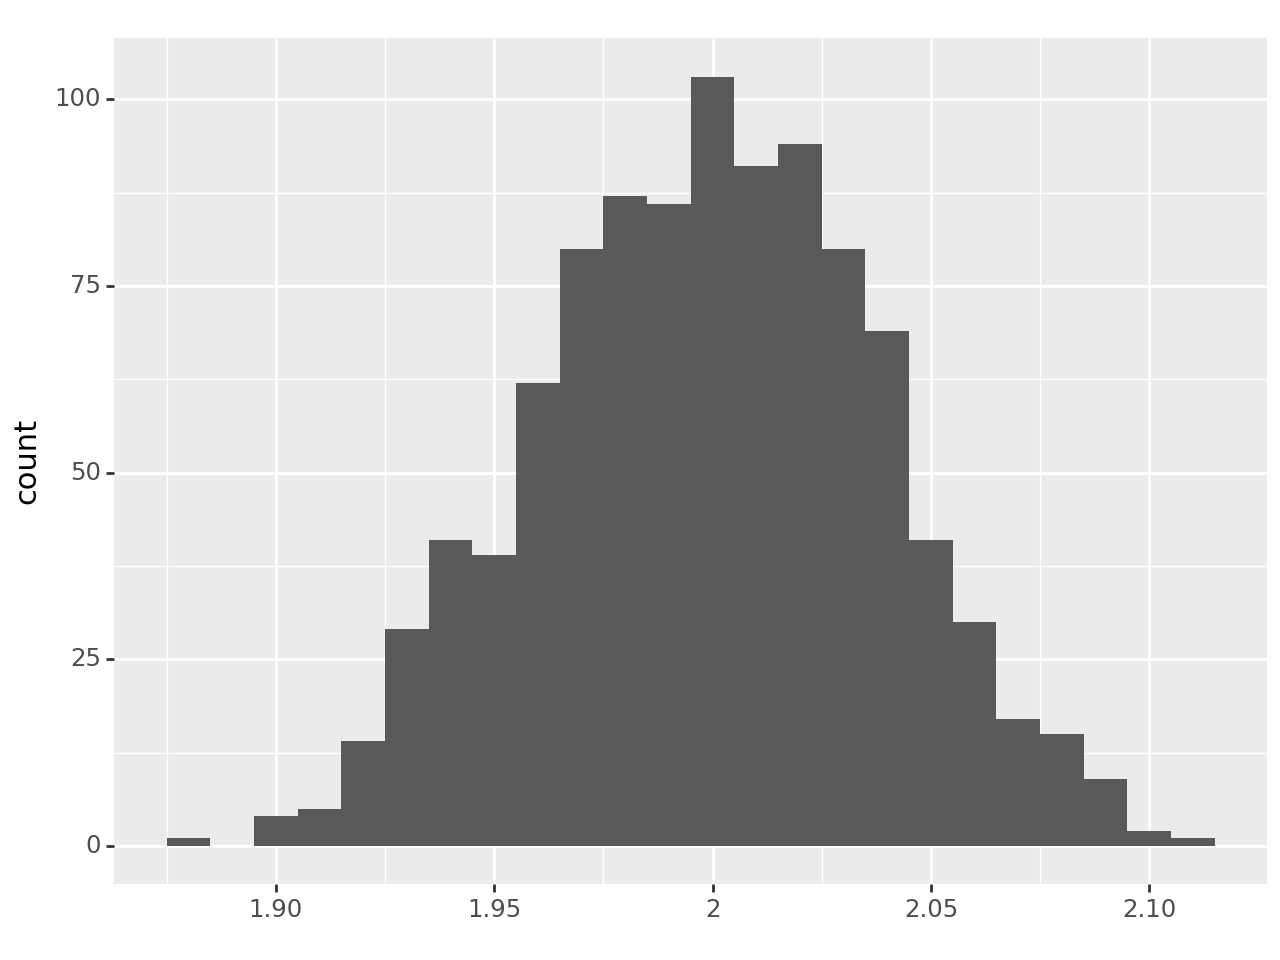

<Figure Size: (640 x 480)>

In [6]:
# y = 3 + 2x + u
# x ~ N(0,9), u ~ N(0, 36)
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import plotnine as p

coefs = np.zeros(1000)
for i in range(1000):
    tb = pd.DataFrame({
    'x': 9*np.random.normal(size=10000),
    'u': 36*np.random.normal(size=10000)})
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values

    reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

    coefs[i] = reg_tb.params['x']

p.ggplot() +\
  p.geom_histogram(p.aes(x=coefs), binwidth = 0.01)



In [7]:
print(np.mean(coefs))
print(np.std(coefs))

1.9993045568663497
0.03890999494209834


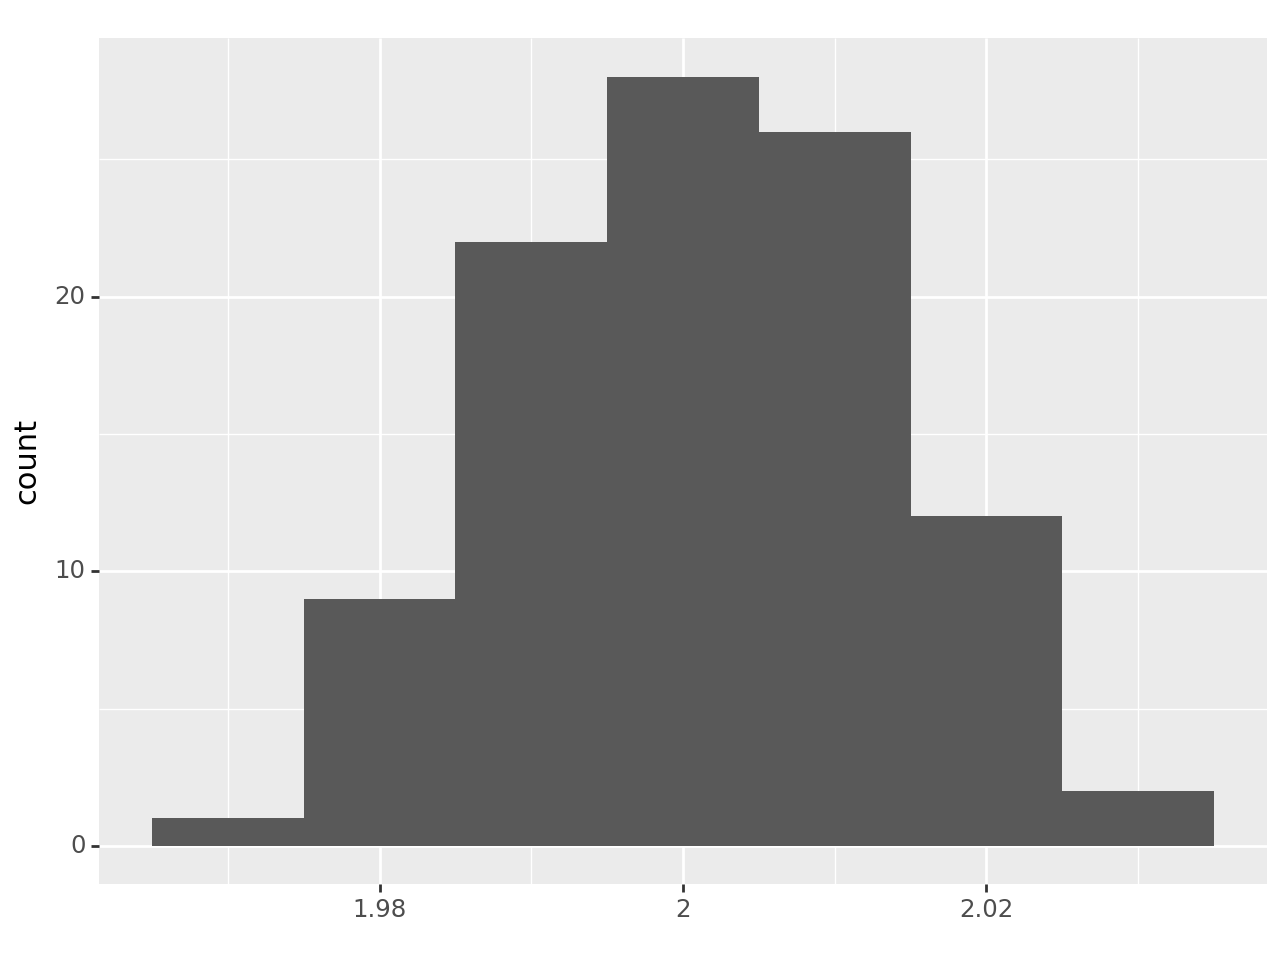

<Figure Size: (640 x 480)>

In [8]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import plotnine as p

coefs = np.zeros(100)
for i in range(100):
    tb = pd.DataFrame({
    'x': 9*np.random.normal(size=100000),
    'u': 36*np.random.normal(size=100000)})
    tb['y'] = 3 + 2*tb['x'].values + tb['u'].values

    reg_tb = sm.OLS.from_formula('y ~ x', data=tb).fit()

    coefs[i] = reg_tb.params['x']

p.ggplot() +\
  p.geom_histogram(p.aes(x=coefs), binwidth = 0.01)

In [9]:
print(np.mean(coefs))
print(np.std(coefs))

2.00143846848096
0.012096798850226206


標本の数$n$と、測定回数$m$の関係についてご存じの方いますか？($nm$の積が一定ならば、どのような測定をしてもよいみたいな。ただ、$n=1$だと線形回帰できないから、$n$に対する下限はありそう)

現実的には、手元にある標本が「ほぼ正確に2」の標本なのか、「2とはかなり異なる」標本なのかはわからない。手元の標本が、母集団をよく代表し、$\hat{\beta}_1$に近い推定値が得られる標本であると望ましいが、そうなっているかどうかは知りようがない。

つまり、$u$が仮定4を満たすと信じるならば不偏性を持つが、推定値そのものが不偏性を持つわけではない。

(物理学でいうところの系統誤差的な意味合いかも)

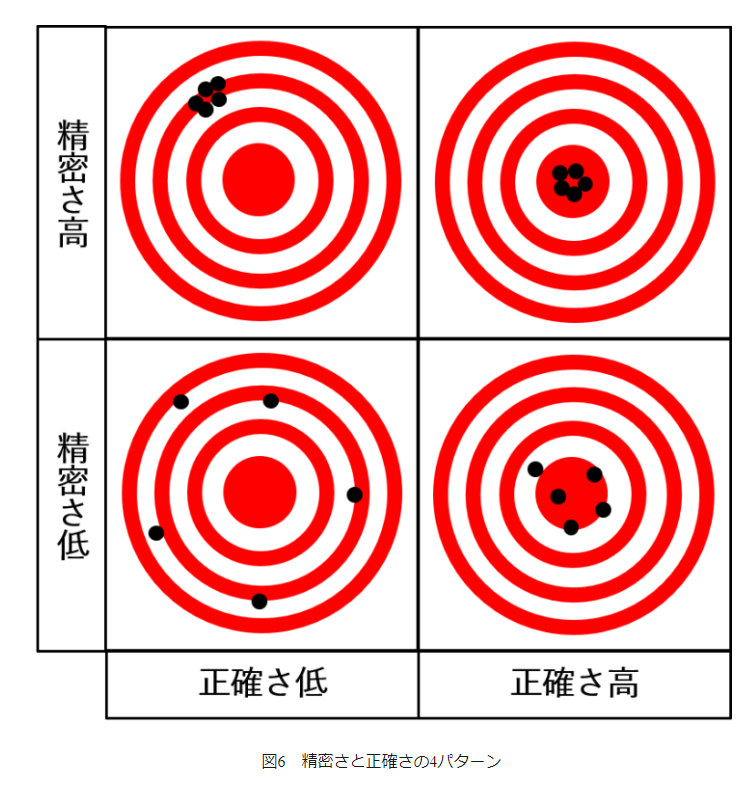

https://studyphys.com/m-error/

# 2.17 繰り返し期待値の法則(law of iterated expectations; LIE)
無条件期待値は条件付き期待値関数(Conditional Expectation Function; CEF)の無条件期待値で書ける。つまり、

$E(y) = E(E(y|x))$

※本文は$y_i$のように$i$の添え字がついていたが、それだと、$i$回目に測定した値に対する平均値、のような印象を受ける(つまり、$j$回目の測定値は$x_i^j$)ので、$i$を外す。以下、同様の理由で$i$を外したところがあるが、$i$をつけたほうがいいのかもしれない...

証明 : 同時密度関数を$f_{xy}(u,t)$、$x=u$が与えられた時の$y$の条件付き分布を$f_{y|x}(t|x=u)$として、周辺密度分布を$g_y(t),g_x(u)$とする。このとき

$E[E[y|x]] = \int E(y|x=u)g_x(u)du$

$=\int [\int t f_{y|x}(t|x=u)dt]g_x(u)du$

$=\iint t f_{y|x}(t|x=u)g_x(u)dudt$

$=\int t [\int f_{y|x}(t|x=u)g_x(u)du]dt$

$=\int t \int f_{x,y} du dt$

$=\int t g_y(t) dt = E(y)$

(下から二行目は積分記号が抜けている？)


# 2.18 CEF分解の性質
任意の確率変数$y$は

$y = E(y|x) + \varepsilon, E(\varepsilon|x)=0$, $\varepsilon$は任意の$x$の関数と無相関

のように、$x$によって説明される部分(CEF)と、任意の$x$の関数と直行する部分に分解できる。

証明 : 

$E(\varepsilon | x) = E(y - E(y|x)) = E(y|x) - E(y|x) = 0$

また、$h(x)$を$x$の任意の関数とすると

$E(h(x)\varepsilon_i) = E(E(h(x)\varepsilon | x)) = E(h(x) E(\varepsilon|x)) = E(h(x)0)=0$

# 2.19 CEF予測の性質
$m(x)$を$x$の任意の関数とした場合、

$E(y|x) = \argmin_{m(x)} E[(y - m(x))^2] $

となる。つまり、CEFは$x$が与えられたときの、$y$の二乗誤差の期待値を最小化するような関数である。

証明 : 

$[y - m(x)]^2 = [(y - E[y|x]) + (E[y|x] - m(x))]^2$

$= (y-E[y|x])^2 + 2 (E[y|x] - m(x))(y-E[y|x])+(E[y|x]-m(x))^2$

ここで、$h(x)=2(E[y|x]-m(x)),\varepsilon=y-E[y|x]$とおくと、

$\argmin_{m(x)} E[\varepsilon^2 + h(x)\varepsilon + [E[y|x]-m(x)]]^2$

と書くことが可能。最初の項$\varepsilon$は$m(x)$に依存しないので無視。二項目はCEF分解の性質より、期待値は0。したがって、これを最小にするのは、$E[y|x]=m(x)$のとき。

# 2.20 分散分析定理 (ANalysis Of VAriance; ANOVA)
ある確率変数の無条件分散は、条件付き期待値の分散に条件付き分散の期待値を足したものに等しい：

$V(y) = V[E[y|x]] + E[V(y|x)]$

# 2.21 線形CEF定理
線形のCEFは母集団回帰関数に等しい。つまり、CEFが線形関数なら、CEFの推定には母集団回帰関数を使うべきである。

証明 : $E[y|x]$が線形関数であれば、あるベクトル$\hat{\beta}$に対して、$E[y|x]=x'\hat{\beta}$となる。($x'$?)

CEF分解の性質より

$0 = E[x\varepsilon] = E[x(y-E(y|x))] = E[x(y-x'\hat{\beta})]$

これを解くと$\hat{\beta} = \beta$が得られる。したがって、$E[y|x]=x'\beta$となる??

# 2.22 最良線形予測定理

CEFは$x$が与えられた時、すべての関数のクラスにおいて、$y$の二乗誤差の期待値を最小にするような関数であった。
このことから、母集団回帰関数は、あらゆる線形関数の中で最良のものであることを示すことができる。

# 2.24 それで？

回帰分析は、それが線形関数であれば、CEF自体が線形関数でない場合でも正当化されることがある。分析者はCEFが線形関数であることを確実に知っているわけではないから、これは検討に値する。

回帰分析は、データを推定値に変える装置に過ぎないが、好ましくない状況でも望ましいものを生み出すことができるということ。

回帰解剖定理(regression anatomy theorem)として知られる定理を概観しながら、詳しく見ていく。

# 2.25 回帰解剖定理

わかりやすい証明を提供してくれるFiloso(2013)に習って説明する。私見だが、この定理は重回帰モデルの個々の係数を解釈するのにも役立つ。

例えば、家族の人数が労働供給に与える因果効果に興味があるとする。このとき、労働供給を家族の人数に回帰すると

$Y_i = \beta_0 + \beta_1 X_i + u$

となる。ここで、$Y$は労働供給量、$X$は家族の人数。

家族の人数が真にランダムに決まるのなら、子供の数は観測されない誤差項と無相関(夫婦は固定？)

この場合、推定値$\hat{\beta}_1$は、家族の人数の労働供給に対する平均的な因果効果と解釈可能。また、全データをプロットした散布図に回帰直線を重ねると、この回帰直線がこのデータにおける最良の線形近似になっていることがわかる。

しかし、ほとんどの場合、家族の人数はランダムではなく、選択している。つまり、$E(u|X)=E(u)=0$が成り立っている可能性は低い。

ここで、人種と年齢を条件とすれば、家族の人数はランダムに選ばれると仮定する。すると

$Y_i = \beta_0 + \beta_1 X_i + \gamma_1 R_i + \gamma_2 A_i + u_i$

ここで、$Y$は労働供給、$X$は家族の人数、$R$は人種、$A$は年齢、$u$は母集団の誤差項。

この推定を実行するためには、4つの変数のそろったデータと、$X$が$R,A$が与えられた集合に対してランダムに割り振られている必要がある。

このとき、$\hat{\beta}_1$をどのように解釈すればよいのか？回帰解剖定理を用いることで、係数の推定値の意味や、データを2次元で可視化する方法を考えることができる。


回帰解剖定理 : $K$個の共変量を持つ重回帰モデルを考える：

$y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_K x_{Ki} + e_i$

ここで、変数$x_{ki}$を残りのすべての独立変数に回帰する補助回帰(auxiliary regression)として

$x_{ki} = \gamma_0 + \cdots + \gamma_{k-1}x_{k-1i} + \gamma_{k+1}x_{k+1i} + \cdots + \gamma_K x_{Ki} + f_i$

を考える(教科書はミス？)。このとき、$\tilde{x}_{ki} = x_{ki} - \hat{x}_{ki}$は補助回帰の残差。すると、パラメータ$\beta_k$は

$\beta_k = \frac{C(y,\tilde{x}_{k})}{V(\tilde{x}_{k})}$

と書き換えることができる。($i$の添え字を消している) つまり、$\beta_k$の推定量は、補助回帰の残差とアウトカムの共分散について、補助回帰の残差の分散で標準化したもの。

証明（教科書が結構間違いだらけ？なので、結構書き直しています） : 

$\frac{C(y, \tilde{x}_k)}{V(\tilde{x}_k)} = \frac{C(\beta_0 + \beta_1 x_1 + \cdots + \beta_K x_K + e, \tilde{x}_k)}{V(\tilde{x}_k)}$

残差の平均$E[\tilde{x}_k]$は0より、$\beta_0 E[\tilde{x}_k]=0$

また、単回帰の時と同様に、(証明は単回帰に対応する重回帰の仮定がよくわからないため省略)

$\beta_1 E[\tilde{x}_{k} x_1] = \cdots = \beta_K E[\tilde{x}_k x_K] = 0$ ($k$を除く)

$E[e\tilde{x}_k] = E[e(x_k - \hat{x}_k)] = E[e x_k] - E[e \hat{x}_k]$

仮定により、誤差項$e_i$は$x_K$と無相関なので、$E[ex_k]=0$。(残差と誤差項は違うことに注意。教科書は残差と誤差項をごっちゃにしている?)

つぎに

$E[e \hat{x}_k] = E[e(\hat{\gamma}_0 + \cdots + \hat{\gamma}_{k-1}x_{k-1} + \hat{\gamma}_{k+1}x_{k+1} + \cdots + \hat{\gamma_K}x_K)]$

となる。誤差項$e$はどの変数とも無相関なので、すべて0となり、$E[e \hat{x}_k] = 0$となる。結局、

$\frac{C(y, \tilde{x}_k)}{V(\tilde{x}_k)} = \frac{C(\beta_0 + \beta_1 x_1 + \cdots + \beta_K x_K + e, \tilde{x}_k)}{V(\tilde{x}_k)} = \frac{C(\beta_k x_k, \tilde{x}_k)}{V(\tilde{x}_k)}$

ここで、$x_{ki} = \hat{x}_{ki} + \tilde{x}_{ki}$であり、当てはめ値と残差は無相関(単回帰の場合と同じ？)より

$\frac{C(y, \tilde{x}_k)}{V(\tilde{x}_k)} = \frac{C(\beta_k x_k, \tilde{x}_k)}{V(\tilde{x}_k)} = \frac{\beta_k C(\tilde{x}_k, \tilde{x_k})}{V(\tilde{x}_k)} = \frac{\beta_k V(\tilde{x}_k)}{V(\tilde{x}_k)} = \beta_k$

よって示された。

c:\Users\barao\Anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\barao\Anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


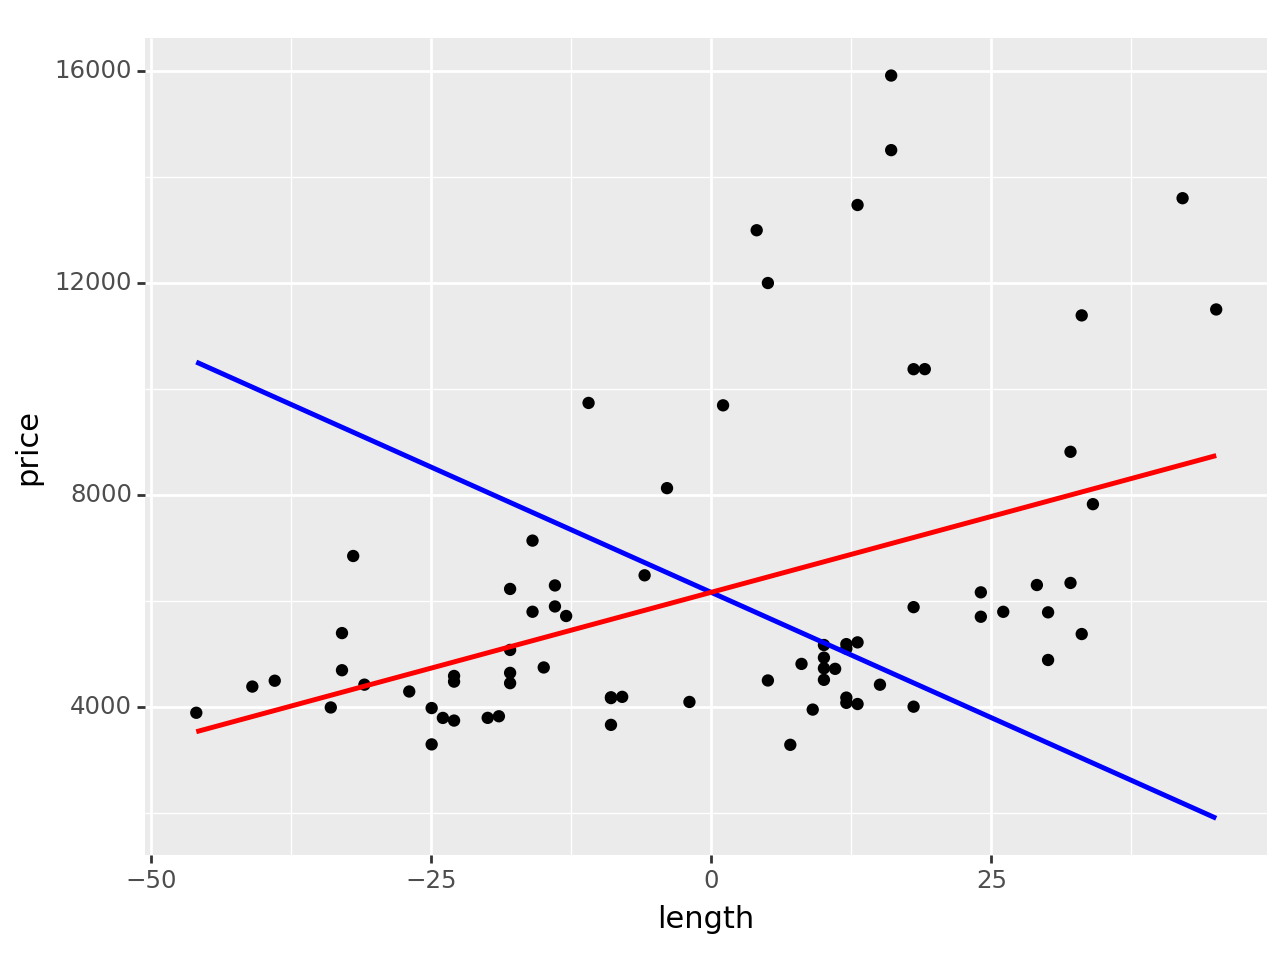

<Figure Size: (640 x 480)>

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

auto = pd.read_stata('https://github.com/scunning1975/mixtape/raw/master/auto.dta')
auto['length'] = auto['length'] - auto['length'].mean()

lm1 = sm.OLS.from_formula('price ~ length', data=auto).fit()
lm2 = sm.OLS.from_formula('price ~ length + weight + headroom + mpg', data=auto).fit()


coef_lm1 = lm1.params
coef_lm2 = lm2.params
resid_lm2 = lm2.resid

auto['y_single'] = coef_lm1[0] + coef_lm1[1]*auto['length']
auto['y_multi'] = coef_lm1[0] + coef_lm2[1]*auto['length']

p.ggplot(auto) +\
  p.geom_point(p.aes(x = 'length', y = 'price')) +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_multi'), color = "blue") +\
  p.geom_smooth(p.aes(x = 'length', y = 'y_single'), color="red")

In [2]:
lm1.summary()
# Lengthだけで回帰すると正の相関

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     16.50
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           0.000122
Time:                        21:41:38   Log-Likelihood:                -688.08
No. Observations:                  74   AIC:                             1380.
Df Residuals:                      72   BIC:                             1385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6165.2568    311.395     19.799      0.000    5544.502    6786.011
length        57.2022     14.080      4.063      0.000      29.133      85.271
==============================================================================
Omnibus:                       22.617   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.201
Skew:                           1.378   Prob(JB):                     2.77e-07
Kurtosis:                       4.484   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
lm2.summary()
# Length, weight, headroomで回帰すると、lengthに関しては負の相関

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     10.21
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           1.49e-06
Time:                        21:41:51   Log-Likelihood:                -678.50
No. Observations:                  74   AIC:                             1367.
Df Residuals:                      69   BIC:                             1379.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3581.3766   4538.813     -0.789      0.433   -1.26e+04    5473.307
length       -94.4965     40.396     -2.339      0.022    -175.084     -13.909
weight         4.3350      1.163      3.728      0.000       2.015       6.655
headroom    -490.9667    388.489     -1.264      0.211   -1265.981     284.048
mpg          -87.9584     83.593     -1.052      0.296    -254.721      78.804
==============================================================================
Omnibus:                        5.211   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.062
Skew:                           0.639   Prob(JB):                       0.0796
Kurtosis:                       2.914   Cond. No.                     5.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

このグラフは何を意味するのか？？

単回帰の傾きは$\frac{C(y,x)}{V(x)}$であるのに対して、重回帰の傾きは、補助回帰における残差による単回帰の傾き$\frac{C(y,\tilde{x})}{V(\tilde{x})}$となっている。

どういうこと？？

# 2.26 OLS推定量の分散

OLS推定量の分散の特徴を明らかにするために、新しい仮定を導入する: 均一分散(homoskedasticity)$V(u|x)=\sigma^2$

このとき、

$E[u^2|x] = V(u|x) + E[u|x]^2 = \sigma^2 + 0 = \sigma^2 $

より

$E[y|x] = \beta_0 + \beta_1 x, V(y|x) = \sigma^2$

つまり、$y$の平均値は$x$によって変化し得るが、$y$の分散は$x$によって変化しない。

定理 : OLSの標本分散

$V(\hat{\beta}_1|x) = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma^2}{SST_x}$

$V(\hat{\beta}_0|x) = \frac{\sigma^2 (\frac{1}{n}\sum_{i=1}^n x_i^2)}{SST_x}$

ここでの分散は、標本分散。つまり、母集団から$n$個のデータを取って$\hat{\beta}_0, \hat{\beta}_1$を計算する行為を$m$回繰り返したときの分散。

証明：

OLS推定量は

$\hat{\beta}_1 = \beta_1 + \sum_{i=1}^n w_i u_i$

と書けて、$w_i = \frac{x_i - \bar{x}}{SST_x}$であった。さらに、互いに無相関の確率変数について変数の和の分散は分散の和になる、${u_i}$は$i$について独立であり互いに無相関、$x$がわかれば$w$が求められることを用いると

$V(\hat{\beta}_1|x) = V(\beta_1 + \sum_{i=1}^n w_i u_i | x) = V(\sum_{i=1}^n w_i u_i | x) = \sum_{i=1}^n V(w_i u_i|x)$

$=\sum_{i=1}^n w_i^2 V(u_i|x) = \sum_{i=1}^n w_i^2 \sigma^2 = \sigma^2 \sum_{i=1}^n w_i^2 = \sigma^2 \sum_{i=1}^n \frac{x_i - \bar{x}}{SST_x^2} = \sigma^2 \frac{SST_x}{SST_x^2} = \frac{\sigma^2}{SST_x}$  

この分散の式を導くには均一分散の式が必要だが、OLS推定量の不偏性を示すにあたっては均一分散の仮定は必要ないことに注意。

この式からわかることとして、誤差項の分散$\sigma^2$が大きくなると、推定値の分散も大きくなる。逆に、${x_i}$のばらつきが大きくなる($SST_x$が大きくなる)と、推定値の分散は減少する。

また、$\frac{SST_x}{n}$は$x$の標本分散。$n$が大きくなると、$x$の標本分散は母分散である$\sigma_x^2$に近づく。つまり

$SST_x \approx n \sigma_x^2$



つまり、推定値の分散は$\frac{1}{n}$の割合で小さくなる。また、$\hat{\beta}_1$の標準偏差は

$sd(\hat{\beta}_1) = \frac{\sigma}{\sqrt{SST_x}}$

また、

$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} = \beta_0 + \beta_1 \bar{x} + \bar{u} - \hat{\beta}_1 \bar{x} = \beta_0 + \bar{x}(\beta_1 - \hat{\beta}_1) + \bar{u}$

ここで、

$E[\hat{\beta}_0|x] = E[\beta_0 + \bar{x}(\beta_1 - \hat{\beta}_1) + \bar{u}|x] = \beta_0 + \bar{x}(\beta_1 - E[\hat{\beta}_1|x] + 0) = \beta_0 + \bar{x}(\beta_1 - \beta_1) = \beta_0$

よって

$V(\hat{\beta}_0|x) = E[(\hat{\beta}_0 - E[\hat{\beta}_0|x])^2|x] = E[((\beta_1 - \hat{\beta}_1)\bar{x} + \bar{u})^2|x]$

$=\bar{x}^2 E[(\beta_1 - \hat{\beta}_1)^2|x] + E[\bar{u}^2|x] + 2\bar{x}E[\bar{u}(\beta_1-\hat{\beta}_1)|x]$

ここで、

$E[(\beta_1 - \hat{\beta}_1)^2|x] = E[\sum_{ij}w_iu_iw_ju_j|x] = \sum_{ij}w_iw_jE[u_iu_j|x] = \sum_i w_i^2 E[u_i^2|x] = \sigma^2 \sum_i w_i^2 = \frac{\sigma^2}{SST_x}$

$E[\bar{u}^2|x] = \frac{1}{n^2} E[\sum_{ij}u_iu_j|x] = \frac{1}{n^2}\sum_i E[u_i^2|x] = \frac{\sigma^2}{n}$

$E[\bar{u}(\beta_1-\hat{\beta}_1)|x] = \frac{1}{n}\sum_i E[u_i(-\sum_j w_ju_j)|x] = -\frac{1}{n}\sum_{ij} w_j E[u_iu_j|x] = -\frac{1}{n}\sum_i w_i \sigma^2 = 0$

より、結局

$V(\hat{\beta}_0|x) = \frac{\bar{x}^2\sigma^2}{SST_x} + \frac{\sigma^2}{n} = \sigma^2 \frac{n\bar{x}^2 + SST_x}{n SST_x}$

分子は

$n\bar{x}^2 + SST_x = n \bar{x}^2 + \sum_i (x_i - \bar{x})^2 = n \bar{x}^2 + \sum_i x_i^2 + n\bar{x}^2 - 2\bar{x}\sum_i x_i = \sum_i x_i^2$

よって

$V(\hat{\beta}_0|x) = \frac{\sigma^2 \frac{1}{n} \sum_i x_i^2}{SST_x}$

誤差の分散を推定する。(証明は間に合いませんでした...)

$\hat{\sigma}^2 = \frac{1}{n-2} \sum_i \hat{u}_i^2$

とおくと

$E(\hat{\sigma}^2) = \sigma^2$

となる。したがって、たいていの統計パッケージでは、回帰分析の結果として

$\hat{\sigma} = \sqrt{\hat{\sigma}^2} = \sqrt{\frac{\sum_i \hat{u}_i^2}{n-2}}$

が出力される。これは、母集団における誤差の標準偏差である$sd(u)$の推定量。厳密には、$\hat{\sigma}$は$\sigma$に対して不偏ではない。($E(\hat{\sigma}) = \sigma$ではない？)この$\hat{\sigma}$は回帰の標準誤差(standard error of the regression)と呼ばれ、回帰のおける誤差の標準偏差の推定量を意味する。なお、二乗平均平方根誤差(root mean squared error)と呼ばれることもある。

回帰の標準誤差$\hat{\sigma}$があれば、$sd(\hat{\beta}_1), sd(\hat{\beta}_0)$を推定することができる。これらの推定値を$\hat{\beta}_j$の標準誤差(standard error)と呼ぶ。標準誤差は、

$se(\hat{\beta}_1) = \frac{\hat{\sigma}}{\sqrt{SST_x}}$

と求められる。

# 2.27 頑健標準誤差

分散が均一であることはルールとして受け入れただけで、むしろ分散は不均一であると信じるべき。分散が不均一である場合、

$V(\hat{\beta}_1) = \frac{\sum_{i=1}^n (x_i - \bar{x})^2 \sigma_i^2}{SST_x^2}$

となる。妥当な推定量は

$V(\hat{\beta}_1) = \frac{\sum_{i=1}^n (x_i - \bar{x})^2 \hat{u}_i^2}{SST_x^2}$

この不均一分散への対応策を「頑健(robust)」標準誤差と呼ぶ。

# 2.28 クラスタ頑健標準誤差

不均一分散だけに気を配っていればよいわけではない。ここの観測値に影響を与えなくても、ここの観測値が所属するグループに影響する場合がある。

例えば、生徒の成績に対するクラスの人数の効果を推定することを考える。このとき、担任の先生のような、すべての生徒に等しく影響する、観測できない要因が存在するとすると、この要因がクラス間で独立であったとしても、クラス内で各々の生徒が相関してしまうため、標準誤差はクラスタリングする必要がある。この問題を説明するために、シミュレーションを行う。

c:\Users\barao\Anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 24'. Pick better value with 'binwidth'.


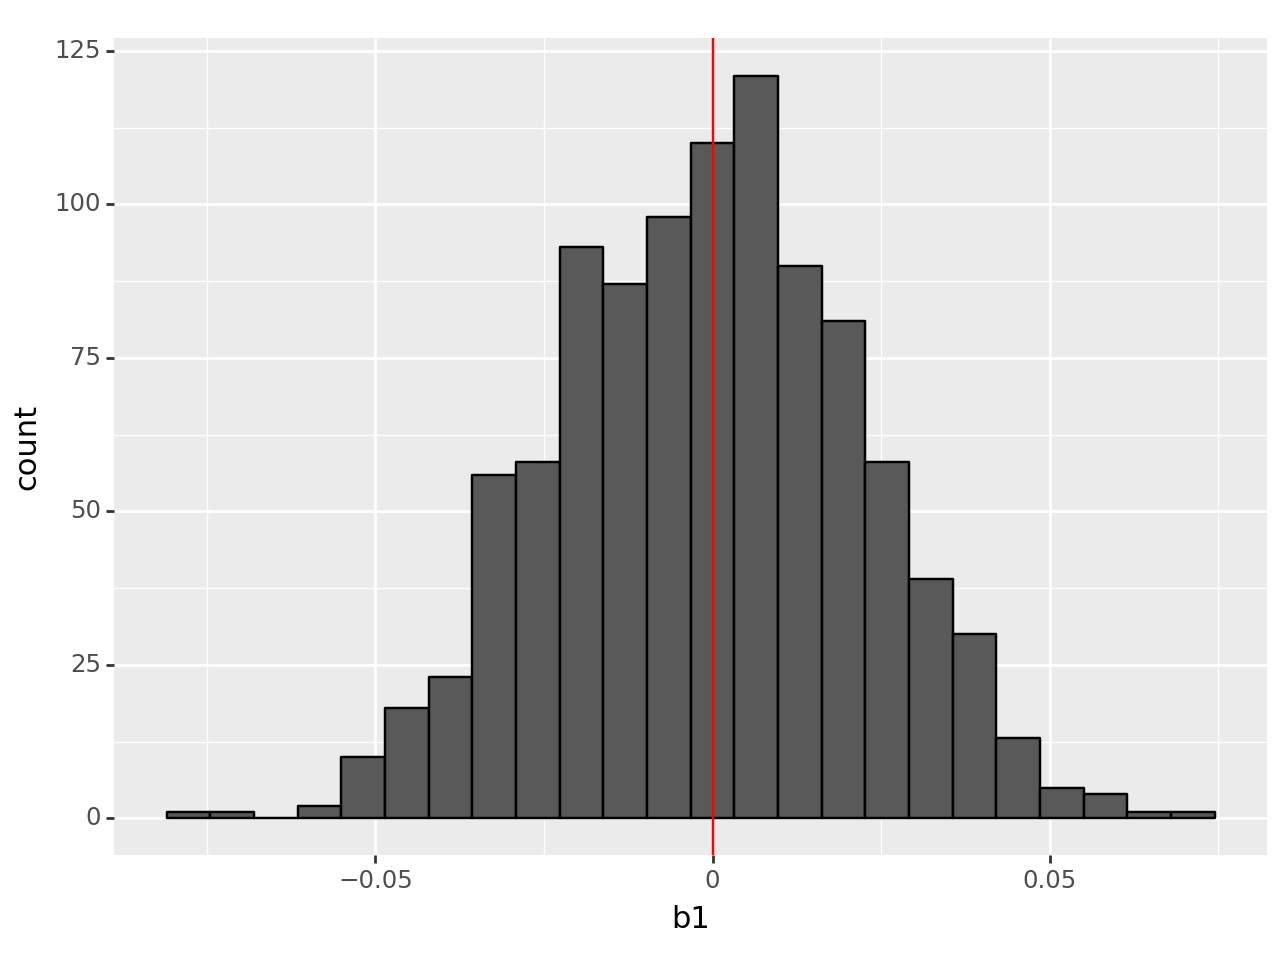

<Figure Size: (640 x 480)>

In [4]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import plotnine as p

def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)

def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df

# Simulation no clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, rho=0, cluster_robust = False)

p.ggplot(sim_nocluster, p.aes('b1')) +\
  p.geom_histogram(color = 'black') +\
  p.geom_vline(xintercept = sim_params[1], color = 'red')

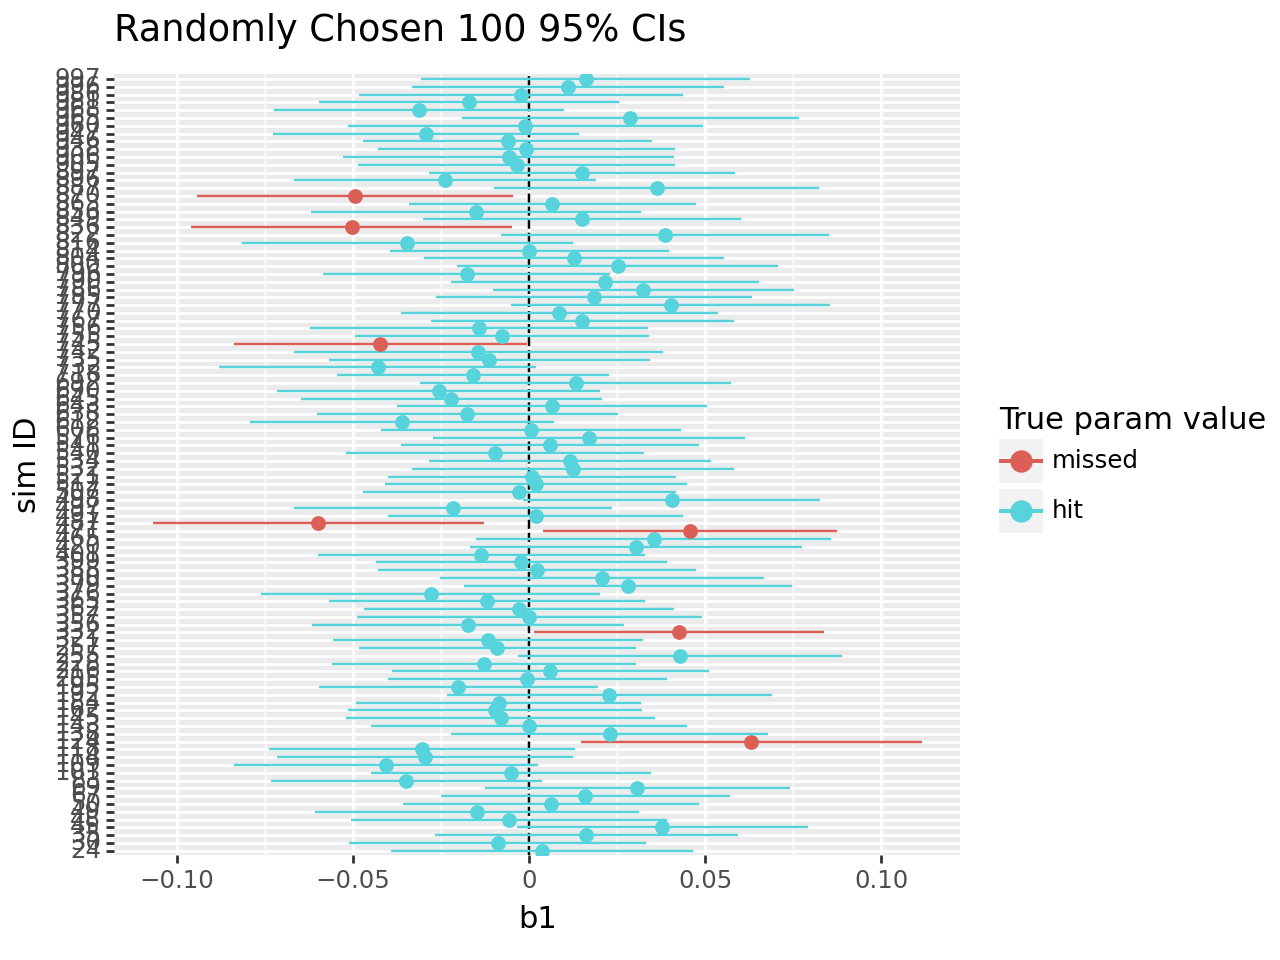

<Figure Size: (640 x 480)>

In [5]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

In [6]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.04400000000000004

c:\Users\barao\Anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


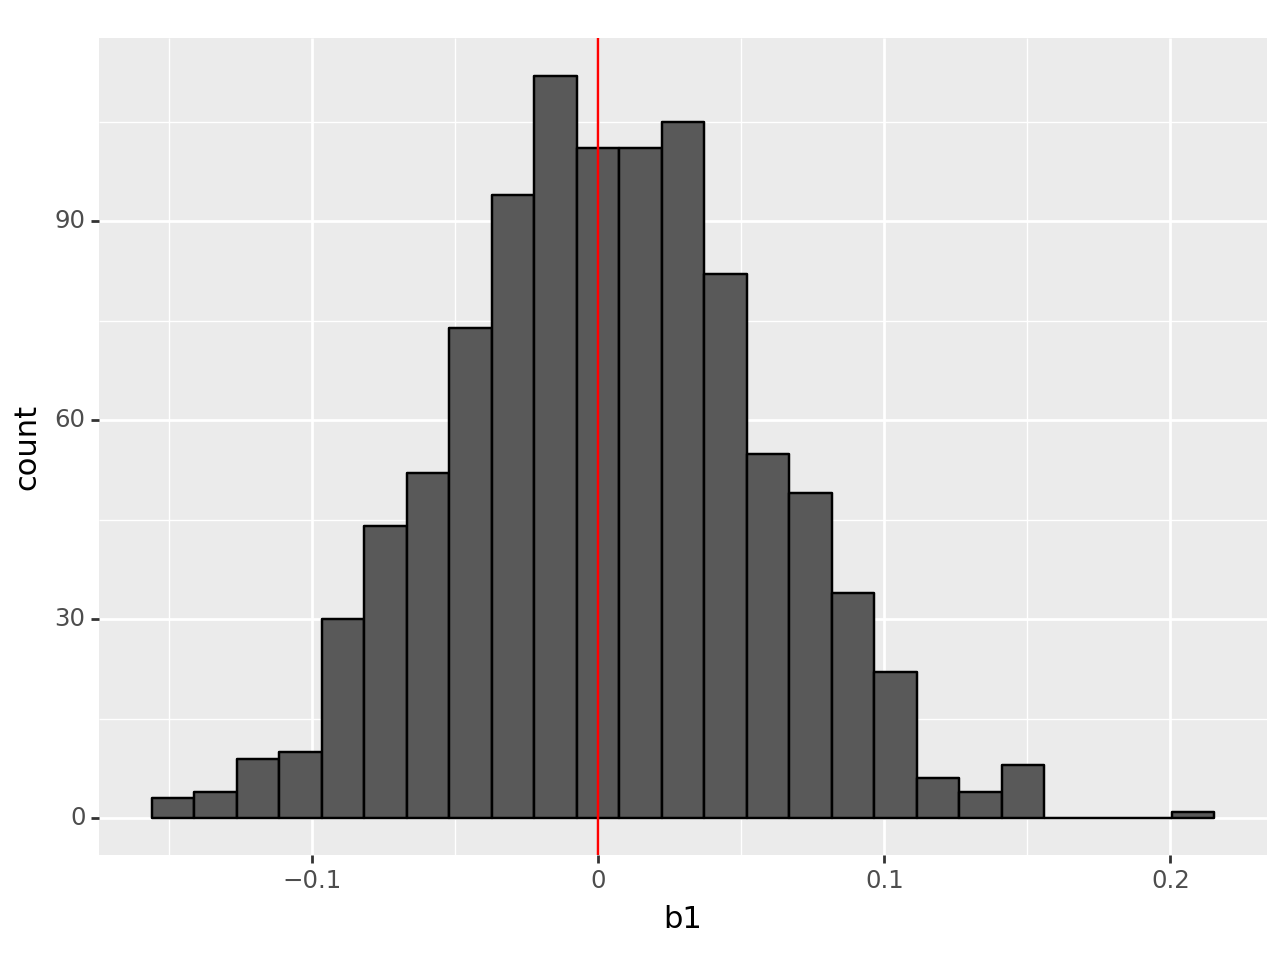

<Figure Size: (640 x 480)>

In [7]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import plotnine as p

def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)

def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = False)

p.ggplot(sim_nocluster, p.aes('b1')) +  p.geom_histogram(color = 'black') +  p.geom_vline(xintercept = sim_params[1], color = 'red')


In [8]:
1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.41900000000000004

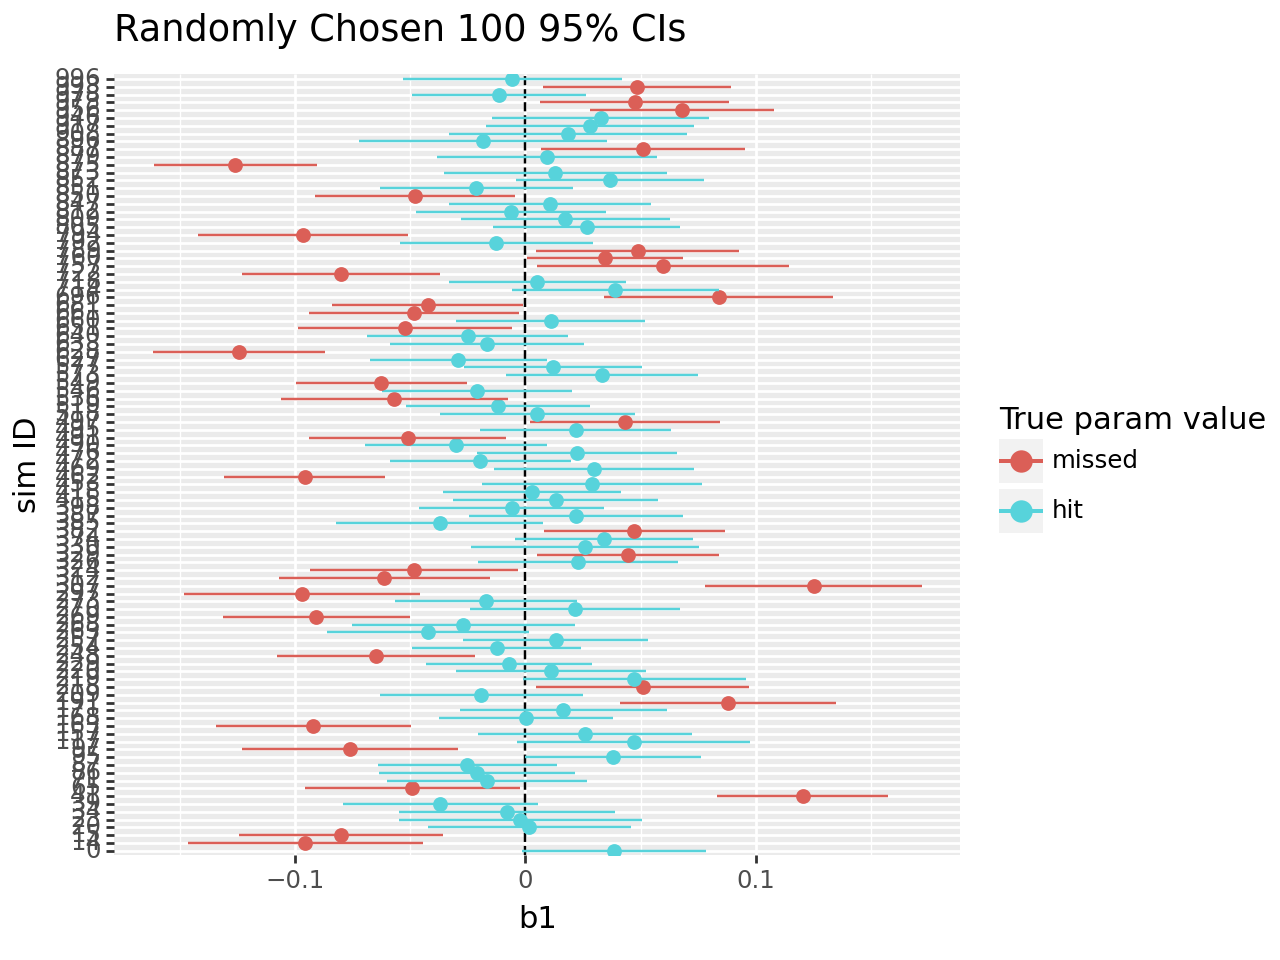

<Figure Size: (640 x 480)>

In [9]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import plotnine as p

def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)

def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = False)


p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

c:\Users\barao\Anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 26'. Pick better value with 'binwidth'.


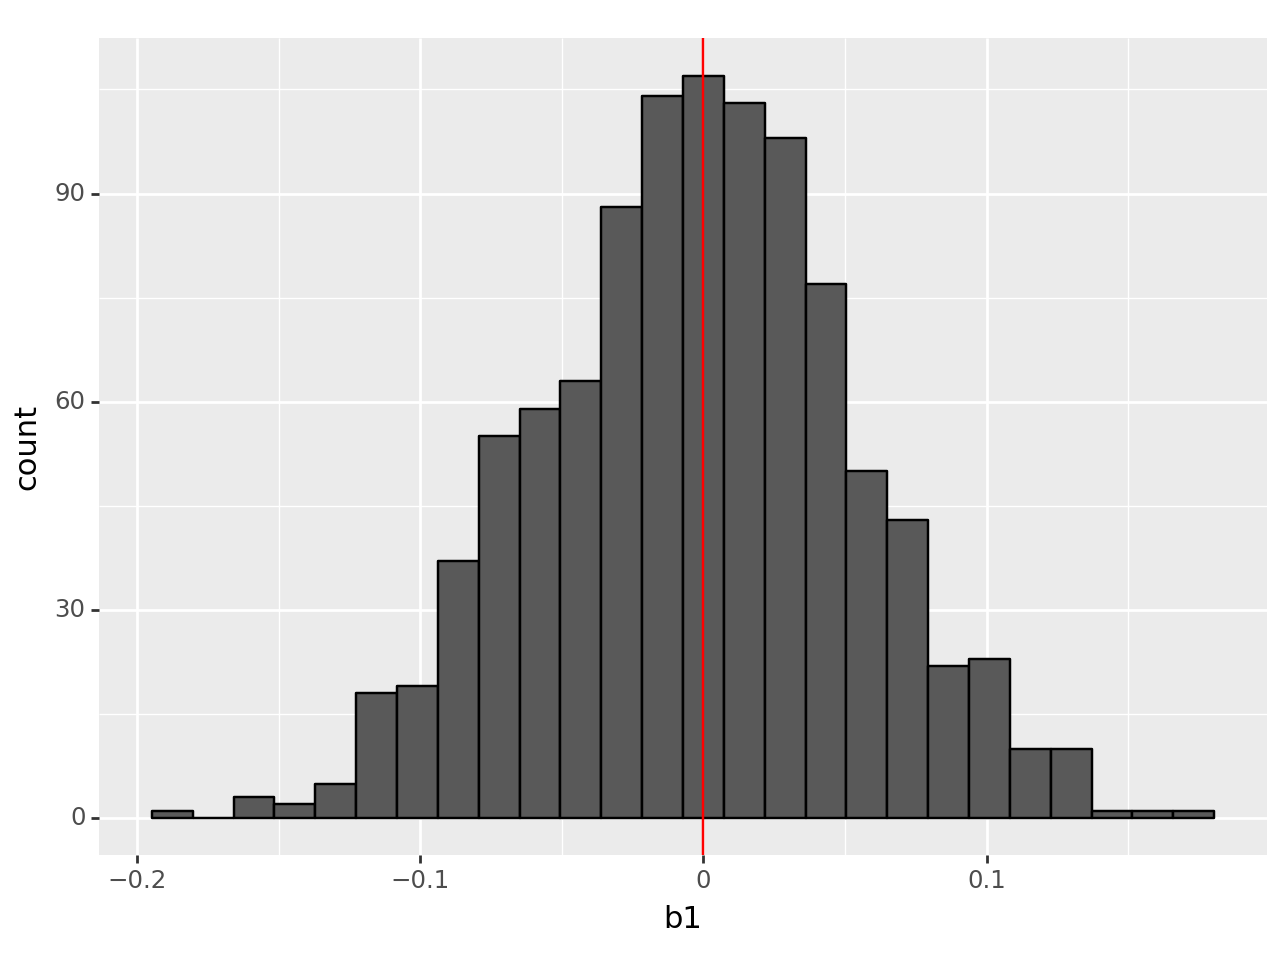

<Figure Size: (640 x 480)>

In [10]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



def gen_cluster(param = (.1, .5), n = 1000, n_cluster = 50, rho = .5):
    # Function to generate clustered data

    # individual level
    Sigma_i = np.array((1, 0, 0, 1 - rho)).reshape(2,2)

    values_i = np.random.multivariate_normal(np.zeros(2), Sigma_i, size = n)

    # cluster level
    cluster_name = np.repeat(np.arange(1, n_cluster+1), repeats = n / n_cluster)
    Sigma_cl = np.array((1, 0, 0, rho)).reshape(2,2)
    values_cl = np.random.multivariate_normal(np.zeros(2),Sigma_cl, size = n_cluster)

    # predictor var consists of individual- and cluster-level components
    x = values_i[: , 0] + np.repeat(values_cl[: , 0], repeats = n / n_cluster)

    # error consists of individual- and cluster-level components
    error = values_i[: , 1] + np.repeat(values_cl[: , 1], repeats = n / n_cluster)

    # data generating process
    y = param[0] + param[1]*x + error
    
    df = pd.DataFrame({'x':x, 'y':y, 'cluster': cluster_name})
    return df

def cluster_sim(param = (.1, .5), n = 1000, n_cluster = 50,
                        rho = .5, cluster_robust = False):

    df = gen_cluster(param = param, n = n , n_cluster = n_cluster, rho = rho)

    if not cluster_robust:
        fit = sm.OLS.from_formula('y ~ x', data = df).fit()
    else: # cluster-robust SE
        fit = sm.OLS.from_formula('y ~ x', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['cluster']})
    
    b1 = fit.params[1]
    Sigma = fit.cov_params()   
    
    se = np.sqrt(np.diag(Sigma)[1])
    ci95 = se*1.96
    b1_ci95 = (b1-ci95, b1+ci95)

    return (b1, se, *b1_ci95)


def run_cluster_sim(n_sims = 1000, param = (.1, .5), n = 1000,
                            n_cluster = 50, rho = .5, cluster_robust = False):

    res = [cluster_sim(param = param, n = n, rho = rho,
                                      n_cluster = n_cluster,
                                      cluster_robust = cluster_robust) for x in range(n_sims)]
    df = pd.DataFrame(res)
    df.columns = ('b1', 'se_b1', 'ci95_lower', 'ci95_upper')
    df['param_caught'] = (df['ci95_lower'] <= param[1]) & (param[1] <= df['ci95_upper'])
    df['id'] = df.index
    return df


# Simulation clustered SE
sim_params = [.4, 0] # beta1 = 0: no effect of x on y
sim_nocluster = run_cluster_sim(n_sims=1000, param = sim_params, cluster_robust = True)

p.ggplot(sim_nocluster, p.aes('b1')) +  p.geom_histogram(color = 'black') +  p.geom_vline(xintercept = sim_params[1], color = 'red')

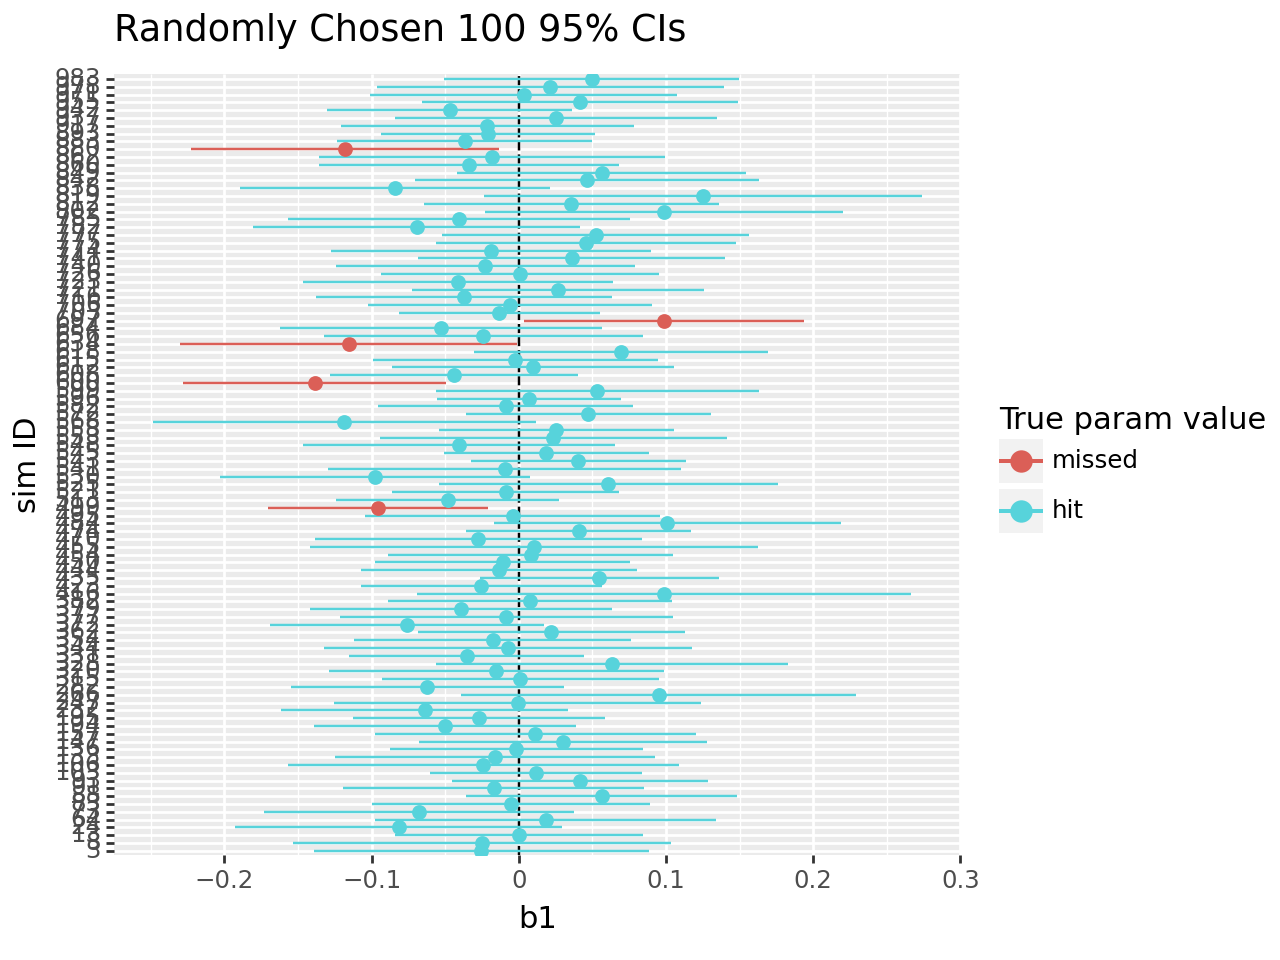

<Figure Size: (640 x 480)>

In [11]:
p.ggplot(sim_nocluster.sample(100).sort_values('b1'),
                         p.aes(x = 'factor(id)', y = 'b1', 
                             ymin = 'ci95_lower', ymax = 'ci95_upper',
                             color = 'param_caught')) +\
  p.geom_hline(yintercept = sim_params[1], linetype = 'dashed') +\
  p.geom_pointrange() +\
  p.labs(x = 'sim ID', y = 'b1', title = 'Randomly Chosen 100 95% CIs') +\
  p.scale_color_discrete(name = 'True param value', labels = ('missed', 'hit')) +\
  p.coord_flip()

In [12]:

1 - sum(sim_nocluster.param_caught)/sim_nocluster.shape[0]

0.07199999999999995